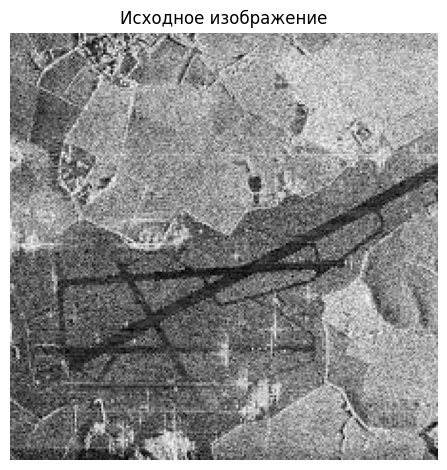

In [120]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
import math

image = cv2.imread('sar_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')
plt.tight_layout()

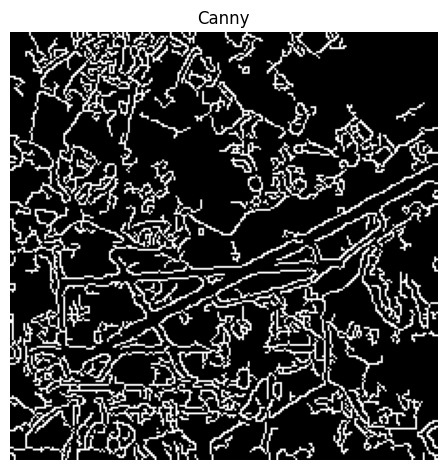

In [121]:
image_gauss_blur = cv2.GaussianBlur(image_gray, (5,5), 0)
canny = cv2.Canny(image_gauss_blur, 50, 150, apertureSize=3)
plt.imshow(canny, cmap='gray')
plt.title('Canny')
plt.axis('off')
plt.tight_layout()

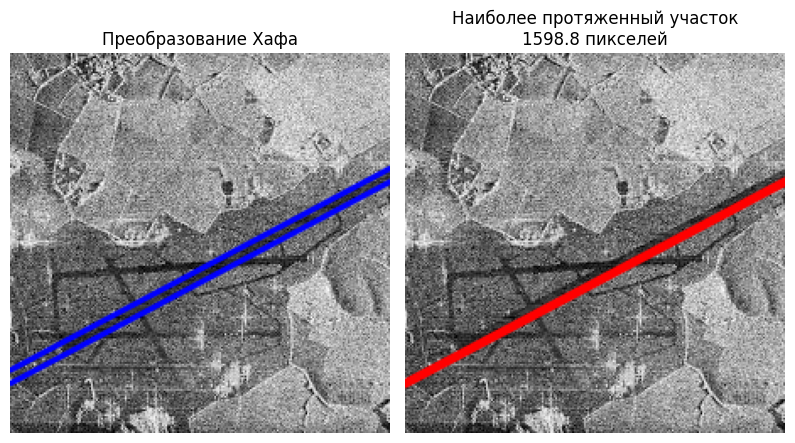

In [122]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 120)

longest_line = None
max_length = 0
image_copy = image.copy()
result = image.copy()

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]

        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho


        pt1 = (int(x0 + 800 * (-b)), int(y0 + 800 * a))
        pt2 = (int(x0 - 800 * (-b)), int(y0 - 800 * a))

        cv2.line(image_copy, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

        length = np.sqrt((pt2[0]-pt1[0])**2 + (pt2[1]-pt1[1])**2)
        if length > max_length:
            max_length = length
            longest_line = (pt1, pt2)

if longest_line is not None:
    cv2.line(result, longest_line[0], longest_line[1], (255, 0, 0), 3, cv2.LINE_AA)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_copy, cmap='gray')
plt.title('Преобразование Хафа')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(result, cmap='gray')
plt.title(f'Наиболее протяженный участок\n{max_length:.1f} пикселей')
plt.axis('off')

plt.tight_layout()

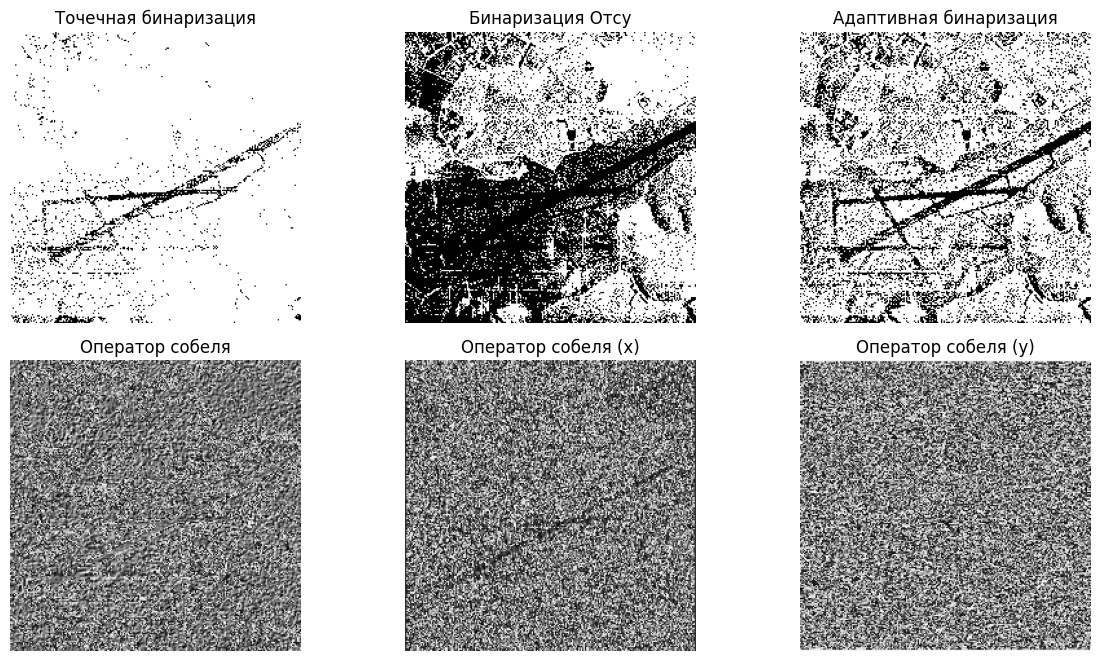

In [123]:
bin_img = copy.deepcopy(image_gray) #точеченая
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) #отсу

th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21) #адаптивная

scale = 1 #собеля
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0.0)

plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 1)
plt.title('Точечная бинаризация')
plt.imshow(bin_img, cmap="gray")
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title('Бинаризация Отсу')
plt.imshow(th2, cmap="gray")
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title('Адаптивная бинаризация')
plt.imshow(th3, cmap="gray")
plt.axis('off')


plt.subplot(3, 3, 4)
plt.title('Оператор собеля')
plt.imshow((grad - grad.min())*255, cmap="gray")
plt.axis('off')

plt.subplot(3, 3, 5)
plt.title('Оператор собеля (x)')
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")
plt.axis('off')

plt.subplot(3, 3, 6)
plt.title('Оператор собеля (y)')
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")
plt.axis('off')

plt.tight_layout()
plt.show()
